# Create Corpus

```yaml
Course:  DS 5001
Module:  03 Lab
Topic:   Create a Corpus
Author:  R.C. Alvarado
Date:    12 December 2023
```

## Purpose

We create a small corpus out of two Jane Austen novles to generate a vocabulary.

This vocabulary will be used to generete a series of n-gram language models in subsequent notebooks.

## Set Up

### Import 

In [1]:
import pandas as pd

### Configure

In [2]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_dir = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

In [5]:
data_dir, output_dir

('/home/rca2t/Documents/MSDS/DS5001/data',
 '/home/rca2t/Documents/MSDS/DS5001/output')

In [9]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
text_file1 = f'{output_dir}/austen-persuasion.csv'
text_file2 = f'{output_dir}/austen-sense-and-sensibility.csv'

## Import and combine texts

In [10]:
text1 = pd.read_csv(text_file1)
text2 = pd.read_csv(text_file2)

In [11]:
text1.head()

,chap_num,para_num,sent_num,token_num,token_str,term_str
0,1,0,0,0,Sir,sir
1,1,0,0,1,Walter,walter
2,1,0,0,2,Elliot,elliot
3,1,0,0,3,of,of
4,1,0,0,4,Kellynch,kellynch


In [12]:
text2.head()

,chap_num,para_num,sent_num,token_num,token_str,term_str
0,1,0,0,0,The,the
1,1,0,0,1,family,family
2,1,0,0,2,of,of
3,1,0,0,3,Dashwood,dashwood
4,1,0,0,4,had,had


In [13]:
text1['book_id'] = 1 # pg105 Persuasion
text2['book_id'] = 2 # pg161 Sense and Sensibility

In [14]:
LIB = pd.DataFrame(columns=['pg_id', 'book_title', 'book_author'], index=[1,2])
LIB.index.name = 'book_id'

In [15]:
LIB.loc[1, ['pg_id', 'book_title', 'book_author']] = ('pg105', 'Persuasion', 'Jane Austen')
LIB.loc[2, ['pg_id', 'book_title', 'book_author']] = ('pg161', 'Sense and Sensibility', 'Jane Austen')

In [16]:
LIB

,pg_id,book_title,book_author
book_id,,,
1,pg105,Persuasion,Jane Austen
2,pg161,Sense and Sensibility,Jane Austen


In [17]:
TOKEN = pd.concat([text1, text2]).dropna().set_index(OHCO)

In [18]:
TOKEN.head()

token_str  term_str
book_id chap_num para_num sent_num token_num                    
1       1        0        0        0               Sir       sir
                                   1            Walter    walter
                                   2            Elliot    elliot
                                   3                of        of
                                   4          Kellynch  kellynch

## Extract a vocabulary

### Nornalize tokens

We use a simple normalization scheme -- remove all non-alphanumeric characters, including underscores.

In [19]:
TOKEN['term_str'] = TOKEN['token_str'].str.lower().str.replace(r'[\W_]', '', regex=True).dropna()

In [20]:
TOKEN

token_str     term_str
book_id chap_num para_num sent_num token_num                          
1       1        0        0        0                  Sir          sir
                                   1               Walter       walter
                                   2               Elliot       elliot
                                   3                   of           of
                                   4             Kellynch     kellynch
...                                                   ...          ...
2       50       22       0        8                  and          and
                                   9          Sensibility  sensibility
                                   10                  by           by
                                   11                Jane         jane
                                   12              Austen       austen

[204802 rows x 2 columns]

### Count tokens

We create a dataframe of unique tokens, i.e. token *types*, which we will call "terms". Our first feature will be their counts.

In [21]:
VOCAB = TOKEN['term_str'].value_counts()\
    .to_frame('n')\
    .sort_index()

In [22]:
VOCAB.sample(10)

,n
term_str,
surely,10
seventeen,8
grow,3
bedchamber,1
swollen,1
parrys,1
execution,1
noises,3
unfairly,6


### Quick look at most frequent terms

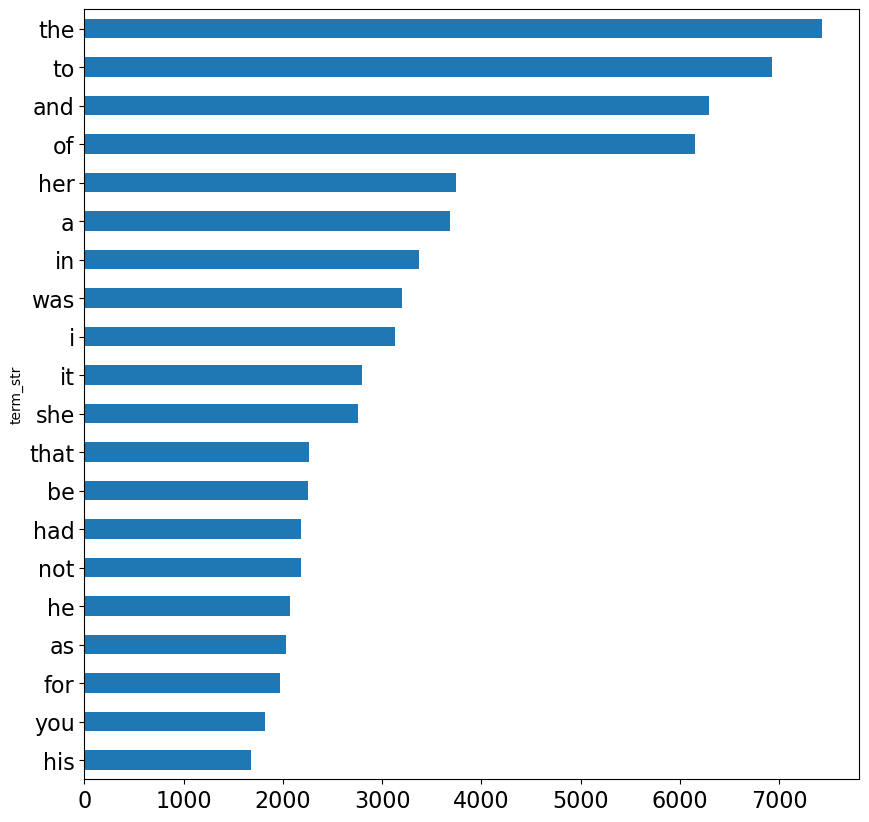

In [23]:
VOCAB.n.nlargest(20).sort_values().plot.barh(figsize=(10, 10), fontsize=16);

Which of these are not stop words?

Would these words become less frequent as the corpus grows and includes a wide range of sources?

## Save

In [24]:
path_prefix = f"{output_dir}/austen-combo"
TOKEN.to_csv(f"{path_prefix}-TOKENS.csv", index=True)
LIB.to_csv(f"{path_prefix}-LIB.csv", index=True)
VOCAB.to_csv(f"{path_prefix}-VOCAB.csv", index=True)